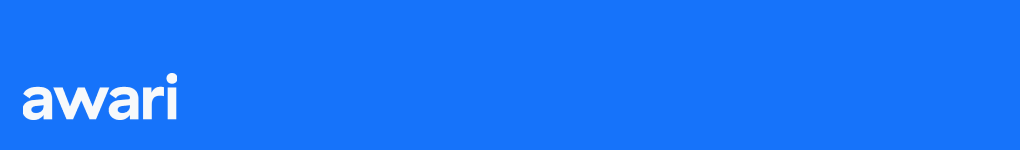

Prática da **Aula 08: Estatística Descritiva II**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Dados Musicais do Spotfy**

## **Objetivo**

Nesta prática, vamos analisar uma base de dados de músicas do Spotify. Tentaremos descobrir diversos *insights* relacionados aos estilos, duração e outras características das músicas do *app*.

## **Prática**

### **Entendendo as features ou variáveis**

Aqui, temos as variáveis ou *features* que estão em nossa base de dados. As descrições estão em inglês, mas são facilmente traduzíveis.

**Feature Explanations**

Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on.

* **duration_ms**: the duration of the track in milliseconds.

* **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **audio_mode**: mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **time_signature**: an estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

* **acousticness**: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **danceability**: danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **energy**: energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

* **instrumentalness**: predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* **speechiness**: speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.

* **audio_valence**: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **tempo**: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **song_popularity**: song ratings of spotify audience.

* **liveness**: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

### **Importando bibliotecas e o dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/persival-iania/datasets/main/spotify.csv', index_col=0)
df.set_index('song_name', inplace=True)

Também temos a base de dados neste arquivo [spotify.csv](https://drive.google.com/file/d/1ChbSeG9TwnVKM3Snq6Ut8l2acO5g6kI_/view?usp=share_link), caso você queira subi-la para seu Google Drive e importá-la via Google Drive para a análise.

### **Análise inicial do dataset**

In [ ]:
df.head(10)

In [ ]:
df.info()

Apesar de as *features* serem apresentadas como sendo de natureza numérica, percebemos que quase todas são definidas como strings(`object`), com exceção de *audio_valence* e *key*.

Também notamos como algumas features apresentam unidades erradas (*acousticness* e *danceability*).

### **Limpeza de dados**

Precisamos transformar os dados do tipo `object` em dados numéricos ou categóricos de acordo com sua funcionalidade.

Para isso, precisamos eliminar os dados faltantes. Antes de mudarmos os dados para numéricos, também precisamos garantir que estão todos limpos de caracteres que não representem números.

In [ ]:
df['song_popularity'].replace('nao_sei', None, inplace=True)
df['song_popularity'] = df['song_popularity'].astype('int')

In [ ]:
df['song_duration_ms'].replace('nao_sei', None, inplace=True)
df['song_duration_ms'] = df['song_duration_ms'].str.strip('kg')
df['song_duration_ms'] = df['song_duration_ms'].astype('float')

In [ ]:
df['acousticness'].replace('nao_sei', None, inplace=True)
df['acousticness'] = df['acousticness'].str.strip('kgmol/L')
df['acousticness'] = df['acousticness'].astype('float')

In [ ]:
df['danceability'].replace('nao_sei', None, inplace=True)
df['danceability'] = df['danceability'].str.strip('kgmol/L')
df['danceability'] = df['danceability'].astype('float')

In [ ]:
df['energy'].replace('nao_sei', None, inplace=True)
df['energy'] = df['energy'].astype('float')

In [ ]:
df['instrumentalness'].replace('nao_sei', None, inplace=True)
df['instrumentalness'] = df['instrumentalness'].str.strip('kgmol/L')
df['instrumentalness'] = df['instrumentalness'].astype('float')

In [ ]:
df['liveness'].replace('nao_sei', None, inplace=True)
df['liveness'] = df['liveness'].astype('float')

In [ ]:
df['loudness'].replace('nao_sei', None, inplace=True)
df['loudness'] = df['loudness'].astype('float')

In [ ]:
df['audio_mode'].replace('nao_sei', None, inplace=True)
df.dropna()
df['audio_mode'] = df['audio_mode'].astype('object')

In [ ]:
df['speechiness'].replace('nao_sei', None, inplace=True)
df['speechiness'] = df['speechiness'].str.strip('nao_sei')
df['speechiness'] = df['speechiness'].astype('float')

In [ ]:
df['tempo'].replace('nao_sei', None, inplace=True)
df['tempo'] = df['tempo'].astype('float')

In [ ]:
df['time_signature'].replace('nao_sei', None, inplace=True)
df['time_signature'] = df['time_signature'].astype('float')

In [ ]:
df['key'].replace('nao_sei', None, inplace=True)

In [ ]:
df.info()

In [ ]:
df.dropna(inplace=True)
df.isna().any()

### **Análise de dados categóricos**

A categoria `audio_mode` descreve a escala da melodia da música, em que 1 representa *major* e 0 *minor*.

In [ ]:
df.audio_mode.describe()

In [ ]:
df['audio_mode'].replace('0', 'minor', inplace=True) #substitui 0 por 'minor'
df['audio_mode'].replace('1', 'major', inplace=True) #substitui 1 por 'major'

In [ ]:
plt.figure(figsize=(8,6))
sns.catplot('audio_mode', data=df, kind='count')
plt.show()

Vemos como a maioria das músicas no dataset estão na escala *major*.

A teoria nos diz que, em geral, músicas nessa escala soam mais "felizes" e músicas em escala 'minor' soam mais "tristes".

No nosso dataset, a *feature* que define essa característica é `audio_valence`. Por meio dela, podemos averiguar a validade da teoria.

In [ ]:
plt.figure(figsize=(8,6))
sns.catplot('audio_valence', 'audio_mode', data=df, kind='boxen')
plt.show()

Apesar do que a teoria nos diz, a escala da música não parece afetar de forma significativa sua valência. O que o gráfico acima nos mostra é que há uma distribuição bem uniforme da valência das entradas quanto a sua escala.

In [ ]:
plt.figure(figsize=(8,6))
minor = df[df['audio_mode'] == 'minor']
major = df[df['audio_mode'] == 'major']

sns.distplot(minor['song_popularity'], hist=False, label='minor')
sns.distplot(major['song_popularity'], hist=False, label='major')

plt.legend()
plt.show()

Também percebemos que não parece haver uma clara preferência do público quanto a escala de uma música. Tanto a escala maior (*major*) quanto a menor (*minor*) parecem ser igualmente populares.

### **Análise de dados numéricos**

Para analisarmos os dados numéricos, começamos com o comportamento geral das *features* e uma visualização da correlação entre os dados.

Dessa forma, temos um norte melhor para onde devemos concentrar nossa análise.

In [ ]:
df.describe().T

A partir da tabela, percebemos um comportamento fora do descrito para a feature `song_duration_ms`.

Essa feature, que representa o tempo de duração das músicas em *ms*, deveria ter somente valores positivos.

No entanto, parecem ocorrer valores negativos que vamos desconsideraremo para a nossa análise.

In [ ]:
duracao_negativa = df[df['song_duration_ms'] < 0]

duracao_negativa['song_duration_ms'].describe()

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['song_duration_ms'])
plt.show()

Nossa suspeita é confirmada pela visualização acima. Há valores válidos maiores que 0 em um pico e outro abaixo de 0, a ser desconsiderado.

Escolhemos desconsiderar os valores negativos uma vez que, pela descrição, percebemos que são poucos os dados que saem do padrão.

In [ ]:
# Retirando durações negativas do dataset
df = df[df['song_duration_ms'] >= 0]

df.song_duration_ms.describe().T

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df.song_duration_ms)
plt.show()

In [ ]:
outliers_song_duration = df[df['song_duration_ms'] >= 600000]

outliers_song_duration['song_duration_ms'].describe()

Também percebemos uma pequena discrepância na feature `loudness`. Seus valores deveriam variar entre -60dB e 0dB, no entanto, observamos valores maiores que zero.

In [ ]:
df = df[df['loudness'] <= 0]
df.loudness.describe()

Mesmo com todos os dados em um intervalo regular, ainda temos dificuldade de visualizar a distribuição devido à presença de *outliers*.

Por isso, para a análise, consideraremos apenas as músicas com duração menor que 600000ms(10min).

Essa escolha não deve ter grande efeito na análise uma vez que existem poucas entradas que apresentam duração maior que 10min (22 músicas).

In [ ]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu_r')

plt.show()

Do *heatmap* percebemos que a maioria das features são muito fracamente relacionadas. Porém, algumas apresentam fortes correlações. Começaremos nossa análise numérica por essas *features*.

#### **Acousticness**

A feature `acousticness` tem forte correlação negativa com `energy` e `loudness`.

In [ ]:
df = df.reset_index()
sns.jointplot(x='acousticness', y='energy', data=df, kind='reg', xlim=(0,1), ylim=(0,1), scatter_kws={"s": 2, 'color': '#eb6b34','alpha':0.5})
plt.show()

In [ ]:
df.acousticness.describe()

In [ ]:
df.energy.describe()

Do gráfico, percebemos algumas coisas.

Músicas muito caracteristicamente acústicas tendem a ser avaliadas como de baixa 'energia', pouco ativas ou 'calmas'.

Porém, também percebemos que a média de acousticness do nosso dataset é relativamente baixa, ou seja, a maioria das músicas não são consideradas acústicas.

Já a distribuição de `energy` é mais homegenea com média mais alta, nos mostrando que há uma maior quantidade de músicas 'agitadas' do que 'calmas'.

In [ ]:
sns.jointplot(x='acousticness', y='loudness',data=df, kind='reg', xlim=(0, 1), ylim=(-60,0), scatter_kws={"s": 2, 'color': '#eb6b34','alpha':0.5})
plt.show()

In [ ]:
df.loudness.describe()

Da mesma forma, há uma correlação negativa de `acousticness` com `loudness`, mesmo que menos intensa em relação à `energy`.

No entanto, observamos uma concentração maior na distribuição de `loudness` tendendo a valores mais próximos de 0, ou seja, músicas consideradas menos 'altas'.

#### **Danceability**

Já `danceability` possue relação significativa com `speechiness` e `audio_valence`.

In [ ]:
sns.jointplot(x='speechiness', y='danceability',data=df, kind='reg', xlim=(0, 1), ylim=(0,1), scatter_kws={"s": 2, 'color': '#eb6b34','alpha':0.5})
plt.show()

In [ ]:
df.danceability.describe()

In [ ]:
df.speechiness.describe()

`speechiness` é a feature que define qual a probabilidade de uma música apresentar discurso falado (em oposição a discurso cantado).
Sabendo disso, podemos observar que as músicas estão muito concentradas em uma região de baixa `speechiness`. Isso significa que a maior parte do nosso dataset representa faixas que possuem pouco ou nenhum discurso falado.

Também percebemos como a `danceability` parece aumentar com a `speechiness`. Intuitivamente, essa tendêcia vai contra o senso comum. Discursos, podcasts e leituras de poesia não são normalmente consideradas como 'dançáveis'. No entando, analisando a forma como `danceability` é calculdada no dataset, percebe-se uma relação clara com ritmo na forma do tempo, regularidade e estabilidade do próprio ritmo.

Essa relação inesperada pode ser causa do baixo número de entradas com alta `speechiness` ou a forma como `danceability` é calculada, uma vez que já foi [estudada](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0071945) a maior correlação de movimento com música do que com discurso falado.

In [ ]:
sns.jointplot(x='audio_valence', y='danceability',data=df, kind='reg', xlim=(0, 1), ylim=(0,1), scatter_kws={"s": 2, 'color': '#eb6b34','alpha':0.5})
plt.show()

In [ ]:
df.audio_valence.describe()

Como é de se esperar, o quanto uma música é apropriada para dançar aumenta com o quão "feliz" ela é, como medido pela `audio_valence`.

#### **Energy**

Já vimos a relação de `energy` com `acousticness`, mas tambem percebemos forte correlação de `energy` com `loudness` e `audio_valence`.

In [ ]:
sns.jointplot(x='audio_valence', y='energy',data=df, kind='reg', xlim=(0, 1), ylim=(0,1), scatter_kws={"s": 2, 'color': '#eb6b34','alpha':0.5})
plt.show()

In [ ]:
sns.jointplot(x='loudness', y='energy',data=df, kind='reg',ylim=(0,1),xlim=(-40,0), scatter_kws={"s": 2, 'color': '#eb6b34','alpha':0.5})
plt.show()

Com base nos gráficos percebemos que tanto `audio_valence` quanto `loudness` têm grande contribuição no quão energética é uma música.

A *feature* `loudness`, em especial, parece ter maior influencia, nos mostrando que músicas mais barulhentas tendem a ser bem mais energéticas.

### **Conclusões finais**

Dadas as *features* apresentadas pelo dataset, percebemos que a grande maioria delas não parecem ser relacionadas.

Porém, das poucas que são, observamos uma tendência já prevista pelo senso comum de músicas mais animadas e felizes serem também mais barulhentas, adequadas para dançar, e, em geral, menos calmas.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**